# Probability distribution for 3d6 pick highest

## Sampling Method

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp


def GenDice(NFace =6, NDice=2, Sample=int(1e6)):
    rng = np.random.default_rng()
    
    dice = rng.integers(low=1,high=NFace+1,size=Sample)

    for i in range(NDice-1):
        dicetemp = rng.integers(low=1,high=NFace+1,size=Sample)
        dice = np.vstack((dice,dicetemp))
    return dice.T



In [3]:
import heapq
def TwoHighest(dice) :
    SampleSize = dice.shape[0]
    res = np.ones(SampleSize)
    
    for i in range(SampleSize):
        temp = heapq.nlargest(2,dice[i,:])
        res[i] =  temp[0] + temp[1]
    return res
def TwoLowest(dice) :
    Sample = dice.shape[1]
    res = np.ones(Sample)


    for i in range(Sample):
        temp = heapq.nlowest(2,dice[i,:])
        res[i] =  temp[0] + temp[1]

    return res

In [4]:
ThreeDice6 = GenDice(6,3,int(1e5))
Proba = TwoHighest(ThreeDice6)

(array([0.00441, 0.01414, 0.03267, 0.05467, 0.08826, 0.12448, 0.15673,
        0.1663 , 0.15763, 0.126  , 0.07471]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <BarContainer object of 11 artists>)

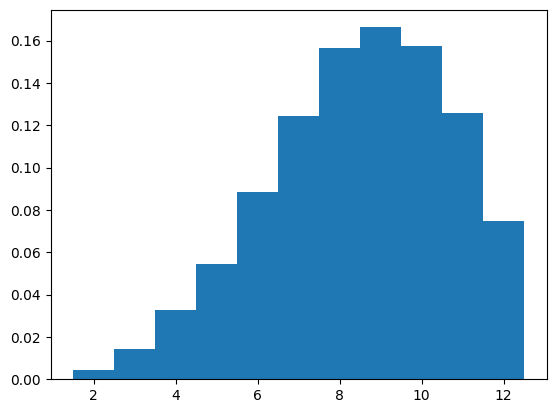

In [5]:
plt.figure()
plt.hist(Proba,bins=11,range=(2,13),density=True,align="left")

## Combinatronics Method
We will use the cartesian product to generate every combination possible

[[2.00000000e+00 3.00000000e+00 4.00000000e+00 5.00000000e+00
  6.00000000e+00 7.00000000e+00 8.00000000e+00 9.00000000e+00
  1.00000000e+01 1.10000000e+01 1.20000000e+01]
 [1.28600823e-04 6.43004115e-04 3.98662551e-03 1.02880658e-02
  2.71347737e-02 5.20833333e-02 9.97942387e-02 1.54320988e-01
  2.18106996e-01 2.37268519e-01 1.96244856e-01]]


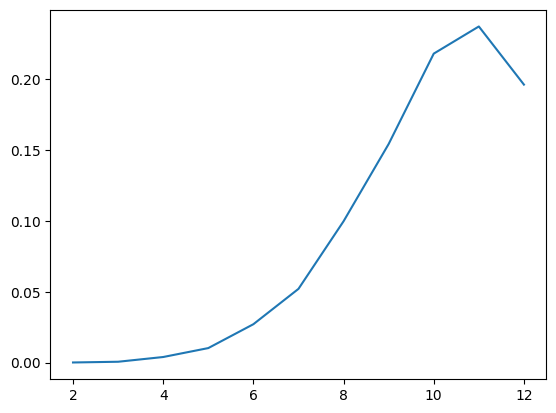

In [144]:
from itertools import product
from collections import Counter

def GetProbaDiceRoll(NSide=6 , NDice=3 , Avantage=True):
    #Every combination of 3 dice stored in a numpy array
    rolls = np.array(list(product(range(1,NSide+1),repeat = NDice)))

    #the sums of the two highest or lowest 
    if Avantage is True :
        Rolls = np.sort(rolls)[:,-2:]
    else :
        Rolls = np.sort(rolls)[:,:2]

    sums = np.sum(Rolls,axis=1)

    res = np.array(list(Counter(sums).items())).astype(float)
    #count occurences of each sum
    sum_counts = res[:,1]

    #Total number of outcomes possible 
    total_outcomes = float(len(rolls))

    res[:,1] = (sum_counts/total_outcomes)
    return res  

res = GetProbaDiceRoll(6,5).T
print(res)

plt.figure()
plt.plot(res[0],res[1])